In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import *
from fitlib.rsquare import rsquare

# Best fit function

So far, the best fit function seems to be the one with the sqrt term:
$$a + \frac{b}{\sqrt{1-\left(\frac{F_c}{F}\right)^2}}$$
The cutoff frequencies for the waveguides are (https://www.everythingrf.com/tech-resources/waveguides-sizes) :

Band | EIA | cutoff f [GHz]
---|---|---
K | wr42 | 14.047 
Ka | wr28 | 21.081
U | wr19 | 31.391

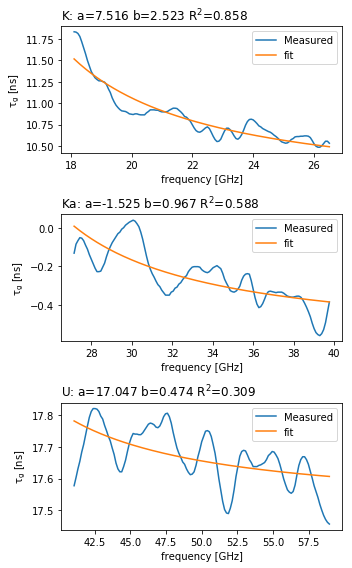

In [2]:
bands = ['K', 'Ka', 'U']
param = [14.047, 21.081, 31.391]

#Initialize fc as a global variable to use in ft2
fc = param[0]

def ft2(x, a, b):
    return a + b/np.sqrt(1.0-(fc/x)**2)

#Optimized fit Parameters storage
popts = []
#...and Covariance matrices
pcovs = []

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,8))

for band, i in zip(bands, range(len(bands))):
    fname = f"./Files/{band}-LFS_to_fit.dat"
    file = np.loadtxt(fname)
    freq = file[:,0]
    tau = file[:,1]*1e9
    ax[i].plot(freq, tau, label='Measured')        
    ax[i].set_xlabel(r'frequency [GHz]')
    ax[i].set_ylabel(r'$\mathrm{\tau_g}$ [ns]')
    fc = param[i]
    popt, pcov = curve_fit(ft2, freq, tau)
    popts.append(popt)
    pcovs.append(pcov)
    ax[i].plot(freq, ft2(freq, *popt), label='fit')
    ax[i].legend()
    r2 = rsquare(freq, tau, popt, ft2)
    title_str = band + ': a=%0.3f'%(popt[0]) + ' b=%0.3f '%(popt[1]) + r'$\mathrm{R^2}$=%0.3f'%(r2)
    ax[i].set_title(title_str, loc='left')
        
plt.tight_layout()
plt.show()